In [1]:
import matplotlib.pyplot as plt
import pandas as pd

dp5 = pd.read_csv('dpm-opt-experiments.csv')
dp2 = pd.read_csv('dpm-experiments-p2.csv')

In [2]:
def filter_solved(df: pd.DataFrame) -> pd.DataFrame:
    df["solved"] = df["lower_bound"] == df["incumbent"]
    return df.query("solved == True", inplace=False)

In [ ]:
filter_solved(dp5)
filter_solved(dp2)
print("")

,name,warmstart,lb1_start,lb5_start,incumbent,lower_bound,execution_time,gap,nodes,sequence,solved
0,dpm-001-20-5x6,1444,1297,1317,1365,1365,0.267941,0.0,20439,"[17, 14, 2, 16, 19, 10, 12, 9, 6, 5, 1, 4, 3, ...",True
1,dpm-002-20-5x6,1436,1328,1328,1378,1378,0.167818,0.0,13114,"[8, 6, 16, 14, 19, 7, 5, 3, 9, 1, 12, 4, 15, 1...",True
2,dpm-003-20-5x6,1499,1421,1421,1434,1434,0.008789,0.0,545,"[6, 5, 2, 1, 14, 11, 7, 16, 3, 15, 13, 4, 8, 1...",True
3,dpm-004-20-5x6,1517,1410,1410,1443,1443,0.013820,0.0,520,"[12, 9, 10, 2, 3, 0, 15, 19, 1, 18, 14, 7, 8, ...",True
4,dpm-005-20-5x6,1435,1287,1337,1380,1380,15.109449,0.0,1277161,"[9, 0, 1, 2, 4, 7, 16, 6, 10, 3, 15, 18, 19, 1...",True
5,dpm-006-20-5x6,1461,1434,1434,1434,1434,0.002060,0.0,31,"[8, 12, 7, 6, 16, 11, 0, 17, 3, 15, 9, 13, 4, ...",True
6,dpm-007-20-5x6,1513,1363,1373,1460,1460,0.905414,0.0,77840,"[7, 13, 2, 10, 15, 12, 3, 11, 19, 18, 4, 16, 1...",True
7,dpm-008-20-5x6,1337,1306,1306,1306,1306,0.002284,0.0,21,"[2, 8, 17, 14, 13, 1, 19, 18, 12, 9, 5, 15, 11...",True
8,dpm-009-20-5x6,1538,1458,1473,1497,1497,5.655637,0.0,426207,"[16, 13, 7, 0, 19, 11, 18, 12, 17, 6, 5, 3, 14...",True
9,dpm-010-20-5x6,1497,1350,1351,1421,1421,0.109866,0.0,8489,"[11, 14, 2, 3, 4, 19, 7, 9, 6, 17, 13, 16, 5, ...",True


In [4]:
dp5.columns

Index(['name', 'warmstart', 'lb1_start', 'lb5_start', 'incumbent',
       'lower_bound', 'execution_time', 'gap', 'nodes', 'sequence', 'solved'],
      dtype='object')

In [5]:
df_out = pd.merge(
    dp5[["name", "nodes"]],
    dp2[["name", "nodes"]],
    on="name",
    suffixes=("_5", "_2"),
)

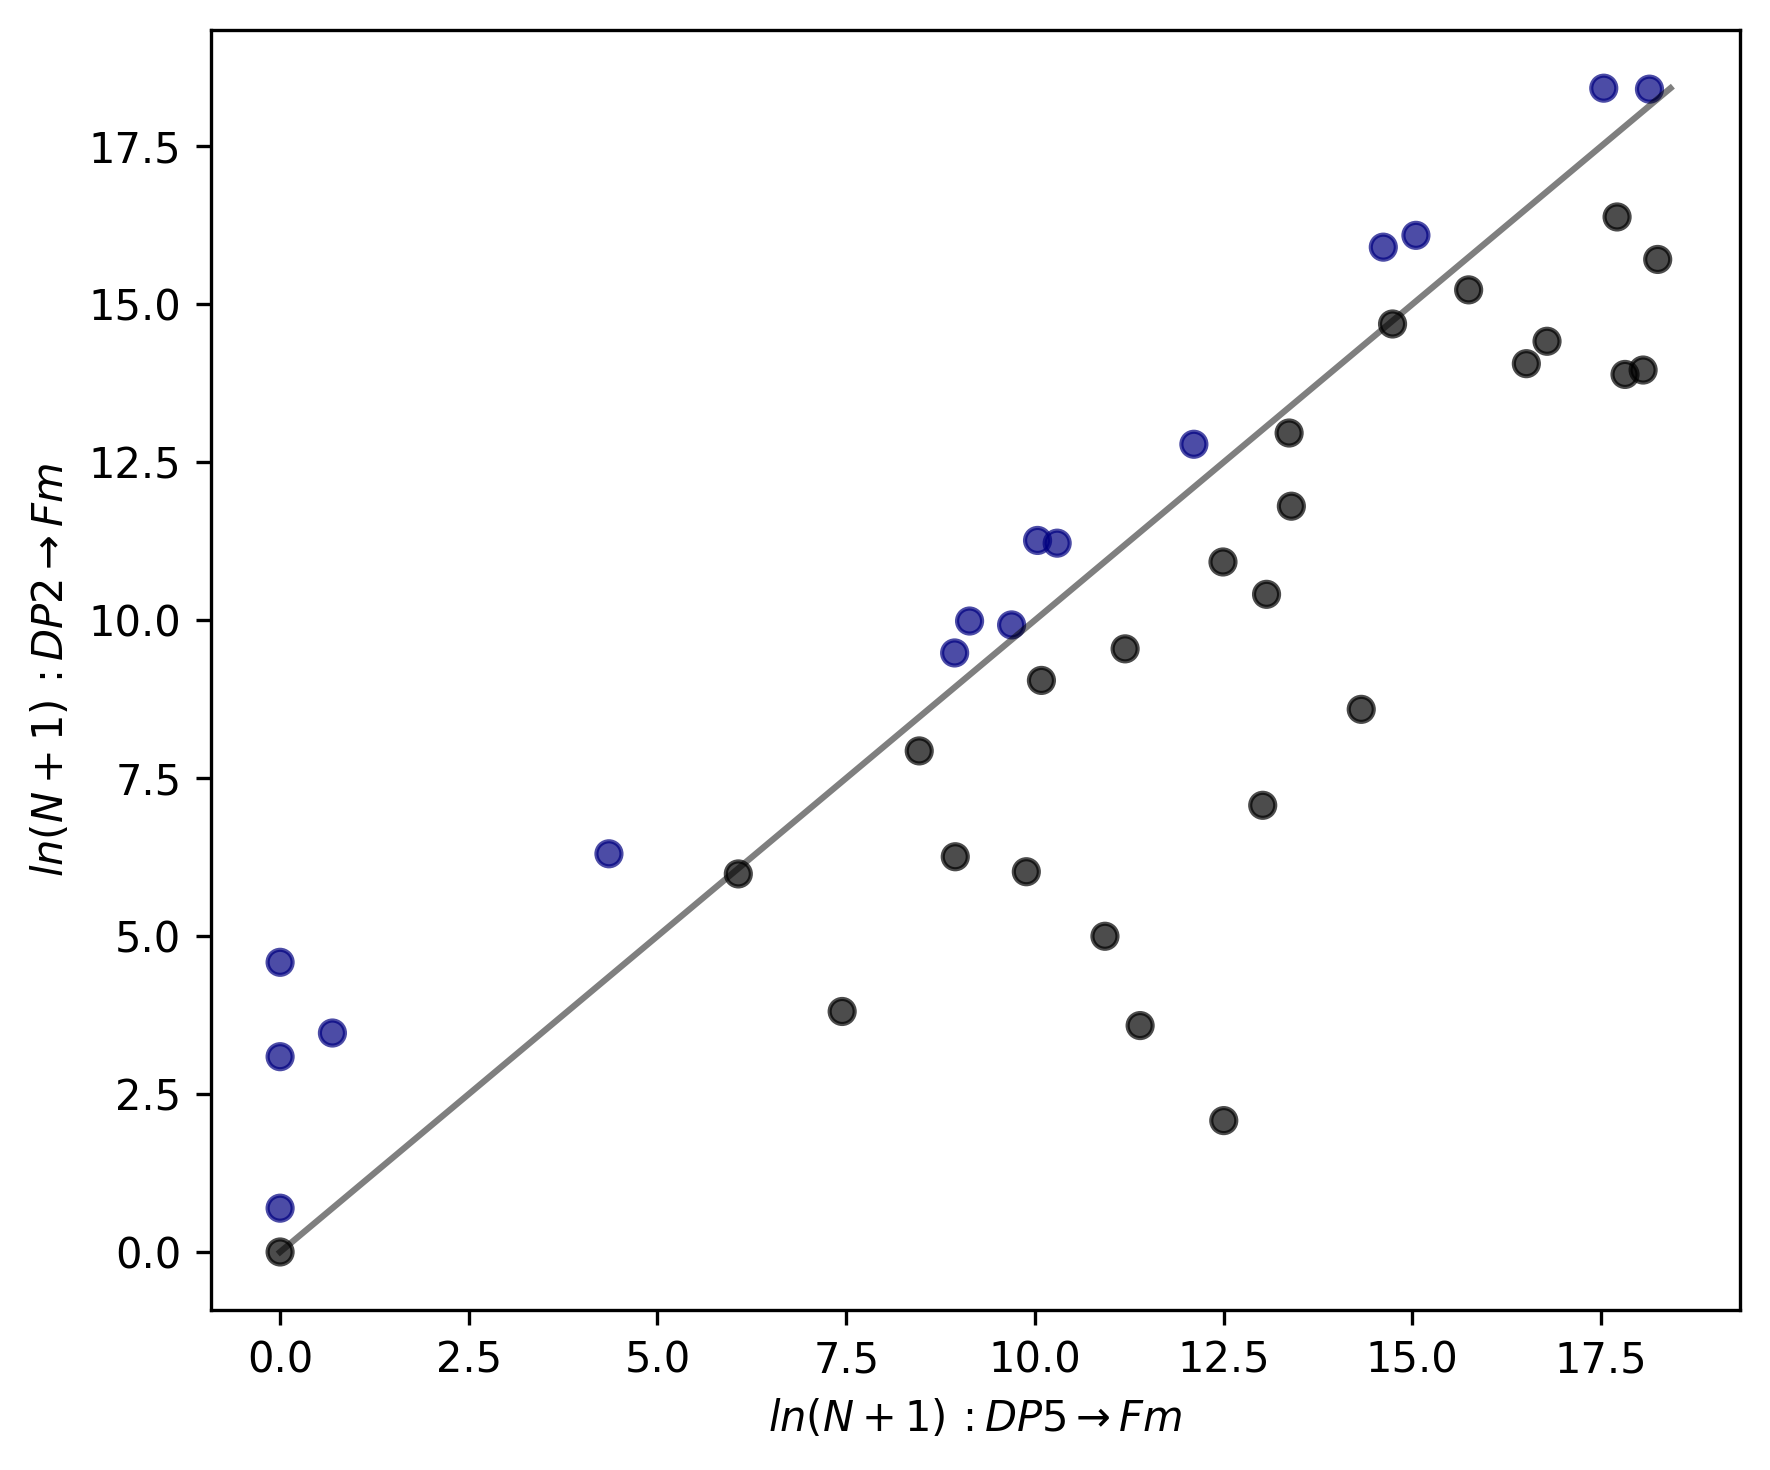

In [6]:
import numpy as np

fig, ax = plt.subplots(figsize=(6, 5), dpi=300)

colors = [
    'navy' if n2 > n5 else 'black'
    for n2, n5 in zip(df_out['nodes_2'], df_out['nodes_5'])
]
ax.scatter(
    np.log1p(df_out['nodes_5']),
    np.log1p(df_out['nodes_2']),
    alpha=0.7,
    c=colors,
)
min_val = min(
    np.log1p(df_out['nodes_5'].min()), np.log1p(df_out['nodes_2'].min())
)
max_val = max(
    np.log1p(df_out['nodes_5'].max()), np.log1p(df_out['nodes_2'].max())
)
ax.plot(
    [min_val, max_val],
    [min_val, max_val],
    color='black',
    linestyle='-',
    alpha=0.5,
)
ax.set_xlabel(r'$ln(N + 1) \, : DP5 \rightarrow Fm $')
ax.set_ylabel(r'$ln(N + 1) \, : DP2 \rightarrow Fm $')
fig.tight_layout()
plt.savefig('nodes-dpm.pdf', bbox_inches='tight')
plt.show()

In [7]:
(df_out["nodes_2"] > df_out["nodes_5"]).sum()

np.int64(15)

## Statistical Analysis

One-sample t-test to check if the difference in log-transformed nodes is significantly different from zero.

In [8]:
from scipy import stats

# Calculate differences in log-transformed nodes
log_diff = np.log1p(df_out['nodes_2']) - np.log1p(df_out['nodes_5'])

# Perform one-sample t-test (null hypothesis: mean difference = 0)
t_statistic, p_value_t = stats.ttest_1samp(log_diff, 0)

print(f"One-Sample T-Test Results:")
print(f"========================")
print(f"Sample size: {len(log_diff)}")
print(f"Mean difference: {log_diff.mean():.4f}")
print(f"Std deviation: {log_diff.std():.4f}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value_t:.6f}")
print(f"\nInterpretation:")
if p_value_t < 0.05:
    if log_diff.mean() > 0:
        print("DP2 explores significantly MORE nodes than DP5 (p < 0.05)")
    else:
        print("DP2 explores significantly FEWER nodes than DP5 (p < 0.05)")
else:
    print("No significant difference between DP2 and DP5 (p >= 0.05)")

# Perform one-sample sign test (null hypothesis: median difference = 0)
# Sign test counts positive vs negative differences
n_positive = (log_diff > 0).sum()
n_negative = (log_diff < 0).sum()
n_total = n_positive + n_negative  # Exclude zeros

# Binomial test: H0: probability of positive = 0.5
sign_test_result = stats.binomtest(n_positive, n_total, 0.5, alternative='two-sided')

print(f"\n\nOne-Sample Sign Test Results:")
print(f"============================")
print(f"Positive differences (DP2 > DP5): {n_positive}")
print(f"Negative differences (DP2 < DP5): {n_negative}")
print(f"Zero differences: {(log_diff == 0).sum()}")
print(f"Total (non-zero): {n_total}")
print(f"P-value: {sign_test_result.pvalue:.6f}")
print(f"\nInterpretation:")
if sign_test_result.pvalue < 0.05:
    if n_positive > n_negative:
        print("DP2 explores significantly MORE nodes than DP5 (p < 0.05)")
    else:
        print("DP2 explores significantly FEWER nodes than DP5 (p < 0.05)")
else:
    print("No significant difference in median between DP2 and DP5 (p >= 0.05)")

One-Sample T-Test Results:
Sample size: 40
Mean difference: -1.2962
Std deviation: 3.0384
T-statistic: -2.6980
P-value: 0.010253

Interpretation:
DP2 explores significantly FEWER nodes than DP5 (p < 0.05)


One-Sample Sign Test Results:
Positive differences (DP2 > DP5): 15
Negative differences (DP2 < DP5): 24
Zero differences: 1
Total (non-zero): 39
P-value: 0.199591

Interpretation:
No significant difference in median between DP2 and DP5 (p >= 0.05)


### Distribution of Log Differences

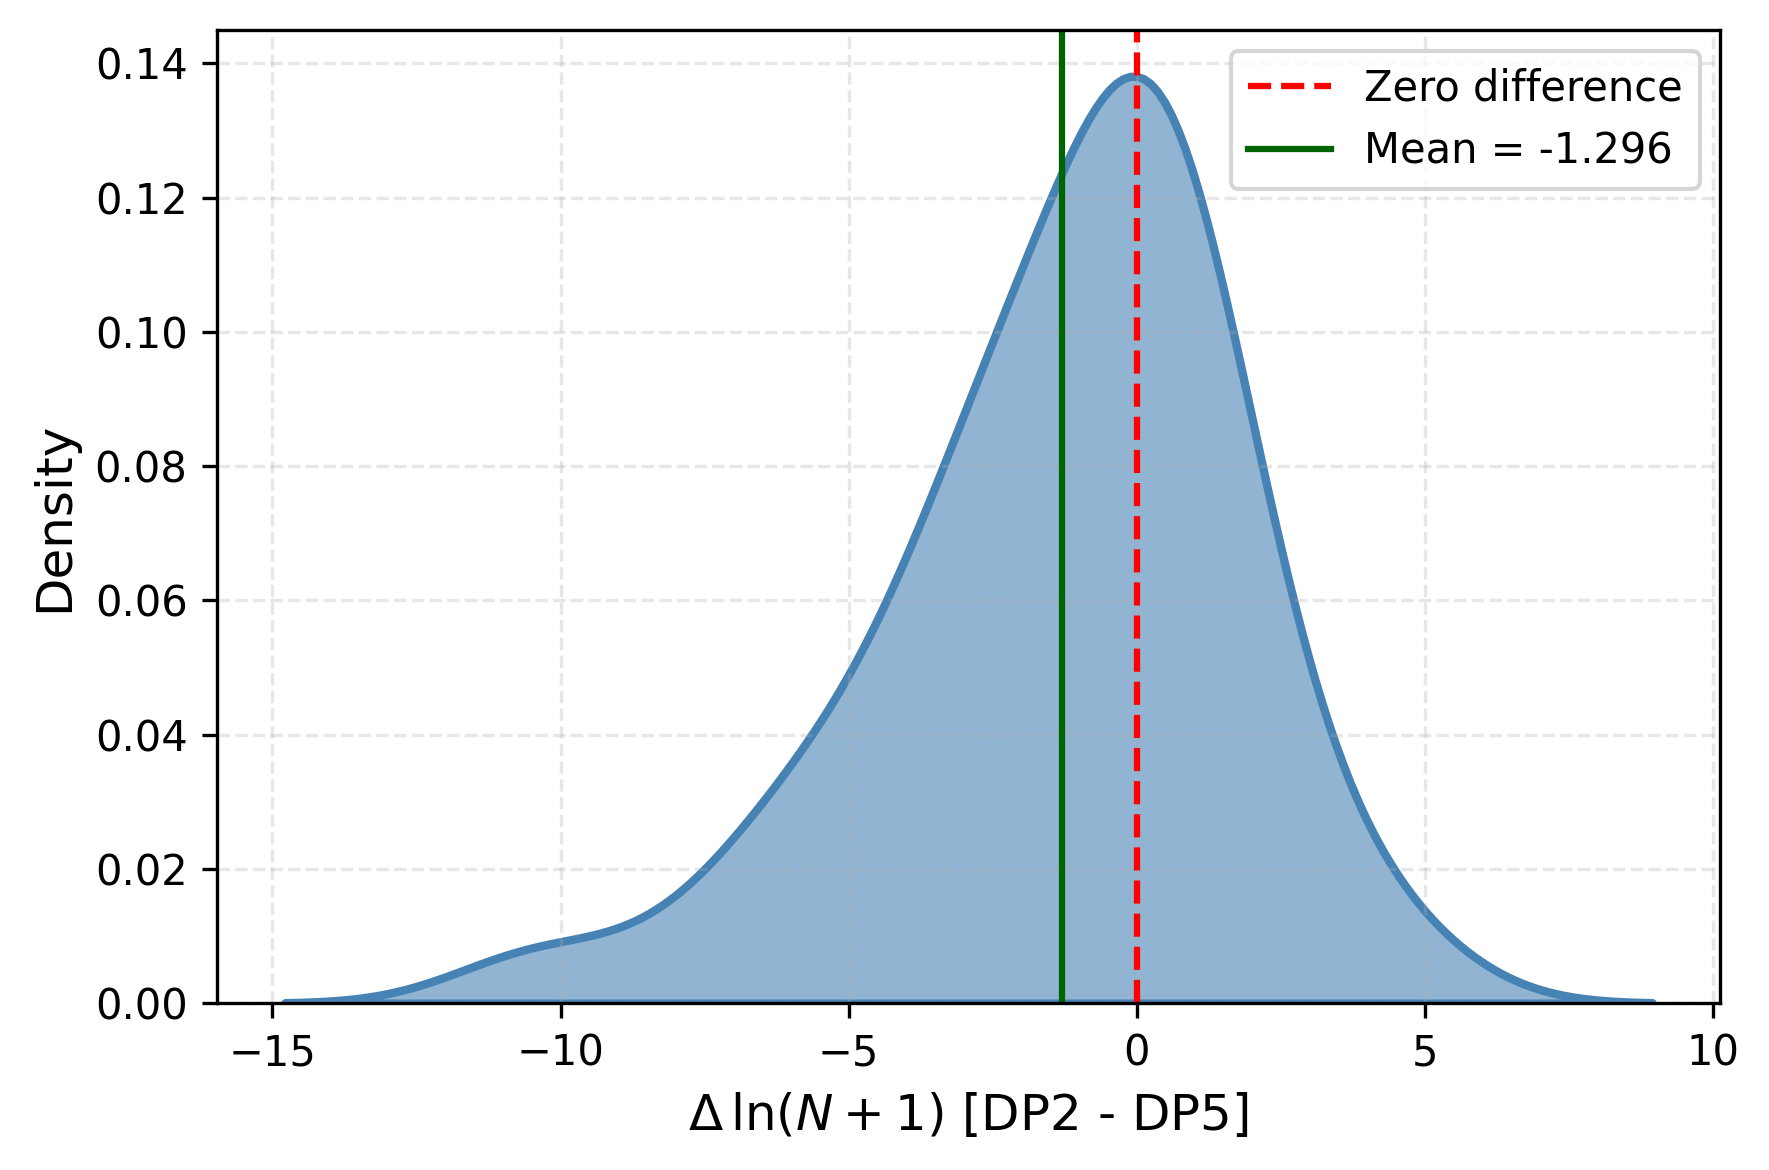


Summary Statistics:
Min: -10.4229
25th percentile: -2.6671
Median: -0.5275
75th percentile: 0.7329
Max: 4.5850

Instances where DP2 > DP5: 15 (37.5%)
Instances where DP2 < DP5: 24 (60.0%)
Instances where DP2 = DP5: 1 (2.5%)


In [9]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

# KDE plot
sns.kdeplot(log_diff, ax=ax, fill=True, color='steelblue', alpha=0.6, linewidth=2)

# Add vertical lines
ax.axvline(0, color='red', linestyle='--', linewidth=1.5, label='Zero difference')
ax.axvline(log_diff.mean(), color='darkgreen', linestyle='-', linewidth=1.5,
           label=f'Mean = {log_diff.mean():.3f}')

# Labels and formatting
ax.set_xlabel(r'$\Delta \, \ln(N + 1)$ [DP2 - DP5]', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.legend(frameon=True, fontsize=10)
ax.grid(alpha=0.3, linestyle='--')

fig.tight_layout()
plt.savefig('log-diff-distribution-dpm.pdf', bbox_inches='tight')
plt.show()

# Summary statistics
print(f"\nSummary Statistics:")
print(f"==================")
print(f"Min: {log_diff.min():.4f}")
print(f"25th percentile: {log_diff.quantile(0.25):.4f}")
print(f"Median: {log_diff.median():.4f}")
print(f"75th percentile: {log_diff.quantile(0.75):.4f}")
print(f"Max: {log_diff.max():.4f}")
print(f"\nInstances where DP2 > DP5: {(log_diff > 0).sum()} ({100 * (log_diff > 0).sum() / len(log_diff):.1f}%)")
print(f"Instances where DP2 < DP5: {(log_diff < 0).sum()} ({100 * (log_diff < 0).sum() / len(log_diff):.1f}%)")
print(f"Instances where DP2 = DP5: {(log_diff == 0).sum()} ({100 * (log_diff == 0).sum() / len(log_diff):.1f}%)")